# IE vs Murders Rate

**Disclaimer: пример выдуман, данных нет. Ноутбук приведен для наглядности.**

# Вариант 1
Пусть число убийств и процент пользователей Internet Explorer линейно зависят от года:

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
_ = plt.xkcd()

In [2]:
rs = np.random.RandomState(0)
years = np.arange(2006, 2012)
ie_users = -0.075 *  years + 151.25 + rs.uniform(size=years.shape[0])*0.1
ie_users

array([0.85488135, 0.79651894, 0.71027634, 0.62948832, 0.54236548,
       0.48958941])

In [3]:
rs = np.random.RandomState(0)
murder_num = -0.075 *  years + 151. + rs.uniform(size=years.shape[0])*0.1
murder_num

array([0.60488135, 0.54651894, 0.46027634, 0.37948832, 0.29236548,
       0.23958941])

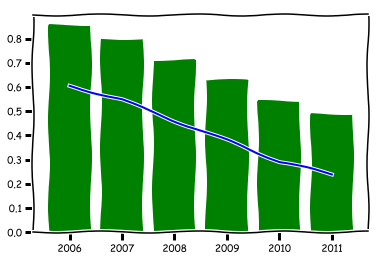

In [4]:
plt.bar(years, ie_users, color='g')
plt.plot(years, murder_num, c='b')

plt.show()

In [5]:
r12 = st.pearsonr(ie_users, murder_num)[0]
r12

0.9999999999999999

In [6]:
r13 = st.pearsonr(ie_users, years)[0]
r13

-0.9977033457324236

In [7]:
r23 = st.pearsonr(murder_num, years)[0]
r23

-0.9977033457324236

## Условная корреляция
$$r_{1,2|3} = \frac{r_{1, 2} - r_{1, 3}*r_{2, 3}}{\sqrt[]{(1-r_{1, 3}^2)(1-r_{2, 3}^2)}}$$

In [10]:
(r12-r13*r23)/(np.sqrt((1 - r13**2)*(1-r23**2)))

0.9999999999999758

# Вариант 2
Оба показателя линейно зависят от числа компьютеров в мире.
Число компьютеров зависит от года.

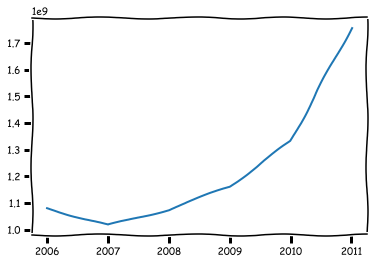

In [11]:
rs = np.random.RandomState(0)
comp_num = 10**9+np.exp(years-2006)*0.5*10**7 + rs.randint(low=0, high=10**8, size=years.shape[0])

plt.plot(years, comp_num)
plt.show()

In [12]:
rs = np.random.RandomState(0)
ie_users =   -0.6/10**9 *  comp_num+1.4 + rs.uniform(size=years.shape[0])*0.1
ie_users 


array([0.80662055, 0.86203503, 0.81488189, 0.75764987, 0.6434386 ,
       0.41032603])

In [13]:
rs = np.random.RandomState(0)
murder_num =  -0.6/10**9 *  comp_num+1.15 + rs.uniform(size=years.shape[0])*0.1
murder_num

array([0.55662055, 0.61203503, 0.56488189, 0.50764987, 0.3934386 ,
       0.16032603])

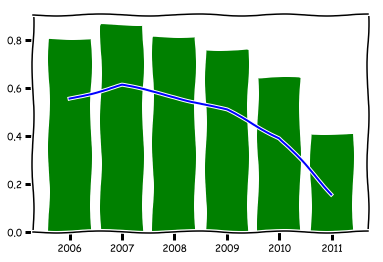

In [14]:
plt.bar(years, ie_users, color='g')
plt.plot(years, murder_num, c='b')

plt.show()

In [15]:
st.pearsonr(years, ie_users)[0]

-0.861487246095062

In [16]:
st.pearsonr(comp_num, ie_users)[0]

-0.9982211910256553

In [17]:
st.spearmanr(years, ie_users)[0]

-0.8285714285714287

In [18]:
st.spearmanr(comp_num, ie_users)[0]

-1.0

In [19]:
r12 = st.pearsonr(ie_users, murder_num)[0]
r12

1.0

In [20]:
r13 = st.pearsonr(murder_num, comp_num)[0]
r13

-0.9982211910256553

In [21]:
r23 = st.pearsonr(ie_users, comp_num)[0]
r23

-0.9982211910256553

## Условная корреляция
$$r_{1,2|3} = \frac{r_{1, 2} - r_{1, 3}*r_{2, 3}}{\sqrt[]{(1-r_{1, 3}^2)(1-r_{2, 3}^2)}}$$

In [22]:
(r12-r13*r23)/(np.sqrt((1 - r13**2)*(1-r23**2)))

1.0

# Вариант 3
Пусть процент убийств снижается с процентом взрослого населения в стране.
Доля IE возрастает.


In [23]:
rs = np.random.RandomState(0)
adult = np.array([32,35,  38, 38, 39, 39])
murder_num = -0.6/10**9 *  comp_num + 0.3 + rs.uniform(size=years.shape[0])*0.1 + adult/40
murder_num

array([0.50662055, 0.63703503, 0.66488189, 0.60764987, 0.5184386 ,
       0.28532603])

In [24]:
rs = np.random.RandomState(0)
ie_users =  -0.6/10**9 *  comp_num+2.2 + rs.uniform(size=years.shape[0])*0.1 - adult/40
ie_users 


array([0.80662055, 0.78703503, 0.66488189, 0.60764987, 0.4684386 ,
       0.23532603])

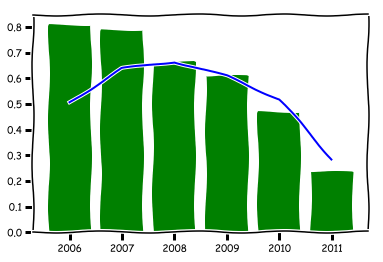

In [25]:
plt.bar(years, ie_users, color='g')
plt.plot(years, murder_num, c='b')

plt.show()

In [26]:
r12 = st.pearsonr(ie_users, murder_num)[0]
r12

0.7738271741358052

In [27]:
r13 = st.pearsonr(murder_num, comp_num)[0]
r13

-0.916089942643887

In [28]:
r23 = st.pearsonr(ie_users, comp_num)[0]
r23

-0.9601569943820956

## Условная корреляция
$$r_{1,2|3} = \frac{r_{1, 2} - r_{1, 3}*r_{2, 3}}{\sqrt[]{(1-r_{1, 3}^2)(1-r_{2, 3}^2)}}$$

In [29]:
(r12-r13*r23)/(np.sqrt((1 - r13**2)*(1-r23**2)))

-0.9438376514862333

In [30]:
r14 = st.pearsonr(murder_num, adult)[0]
r14

-0.2022666855201769

In [31]:
r24 = st.pearsonr(ie_users, adult)[0]
r24

-0.7768242481877352

In [32]:
(r12-r14*r24)/(np.sqrt((1 - r14**2)*(1-r24**2)))

0.9999999999999994

## Условная корреляция через матрицу
$$r_{i,j}|other= \frac{r_{i,j}}{r_{ii}, r_{jj}}$$

### Pearson

In [ ]:
matrix = np.zeros((4,4))
datasets = [ie_users, murder_num, comp_num, adult]
for i in range(4):
    for j in range(i,4):
        matrix[i,j] = matrix[j,i] = st.pearsonr(datasets[i], datasets[j])[0] ### Ваш код тут
matrix

In [ ]:
R = np.linalg.inv(matrix)
R

In [ ]:
### Ваш код тут 1,0|all

### Kendal

In [ ]:
matrix = np.zeros((4,4))
datasets = [ie_users, murder_num, comp_num, adult]
for i in range(4):
    for j in range(i,4):
        matrix[i,j] = matrix[j,i] = st.kendalltau(datasets[i], datasets[j])[0] ### Ваш код тут
matrix

In [ ]:
R = np.linalg.inv(matrix)
R

In [ ]:
### Ваш код тут 1,0|all